<a href="https://colab.research.google.com/github/fahadg992/Code-Lab-ML/blob/main/Concrete_Strength_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae

from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


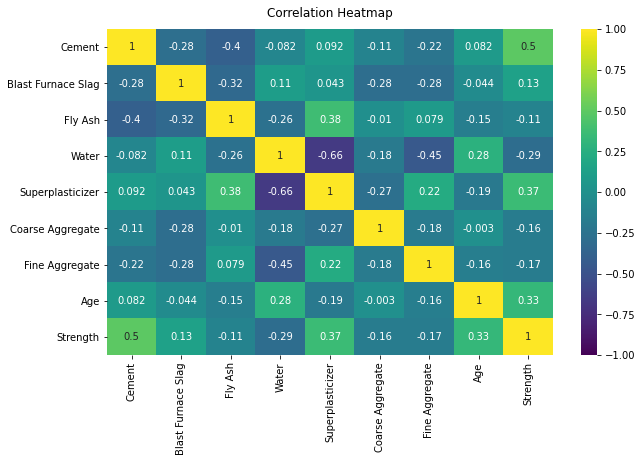

In [ ]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, )

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Target = df.Strength
Predictors = df.drop(columns=['Strength'])
pred_norm = pd.DataFrame(scaler.fit_transform(Predictors), columns=df.columns.values.tolist()[0:-1])

In [ ]:
pred_norm.head()
# Predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [ ]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(pred_norm, Target, test_size=0.1, shuffle=True, random_state=42)
X_val, X_ts, Y_val, Y_ts = train_test_split(X_ts, Y_ts, test_size=0.5, shuffle=True,random_state=42)
pred_norm.shape

(1030, 8)

In [ ]:
#Architecture : Bottleneck
NNR = models.Sequential()

NNR.add(layers.Dense(300, activation='relu', input_shape = (pred_norm.shape[1],)))
NNR.add(layers.Dense(150, activation = 'relu'))
NNR.add(layers.Dense(50, activation = 'relu'))
NNR.add(layers.Dense(150, activation = 'relu'))
NNR.add(layers.Dense(300, activation = 'relu'))
NNR.add(layers.Dense(1))

NNR.compile(loss='mae',
           optimizer='adam',
           metrics = 'mae')
NNR.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_3 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               45300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 108,651
Trainable params: 108,651
Non-trainable params: 0
__________________________________________________

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode='min',patience=5, verbose=1)

hNNR= NNR.fit(X_tr,Y_tr,
             epochs=100,
             validation_data=(X_val,Y_val),
             callbacks=[es])

Epoch 1/100
29/29 [==============================] - 1s 21ms/step - loss: 31.4228 - mae: 31.4228 - val_loss: 11.6098 - val_mae: 11.6098
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 12.8541 - mae: 12.8541 - val_loss: 9.4754 - val_mae: 9.4754
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 9.9331 - mae: 9.9331 - val_loss: 7.5355 - val_mae: 7.5355
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 8.7802 - mae: 8.7802 - val_loss: 6.7349 - val_mae: 6.7349
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 8.2088 - mae: 8.2088 - val_loss: 6.6028 - val_mae: 6.6028
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 7.8853 - mae: 7.8853 - val_loss: 6.1416 - val_mae: 6.1416
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 7.8901 - mae: 7.8901 - val_loss: 5.7013 - val_mae: 5.7013
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 7.4

In [ ]:
Y_pred = NNR.predict(X_ts)

Y_pred = np.array(Y_pred.reshape(Y_pred.shape[0]))

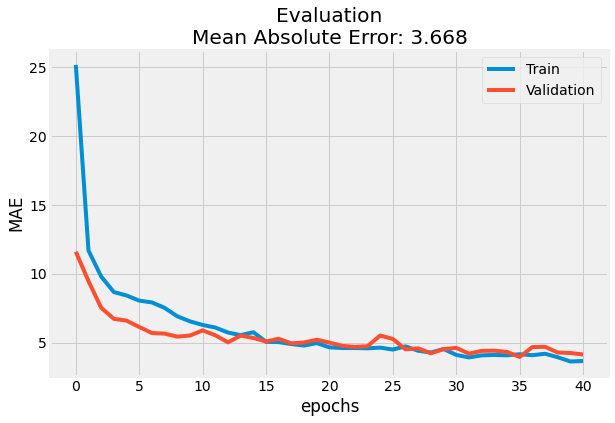

In [ ]:
plt.figure(figsize=(10,6))
with plt.style.context('fivethirtyeight'):

    sns.lineplot(x=np.arange(0,len(hNNR.history['mae'])),y=hNNR.history['mae'])
    sns.lineplot(x=np.arange(0,len(hNNR.history['mae'])),y=hNNR.history['val_mae'])

    plt.legend(['Train','Validation'], loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.title('Evaluation\nMean Absolute Error: {:.3f}'.format(hNNR.history['mae'][-1]))

plt.show()

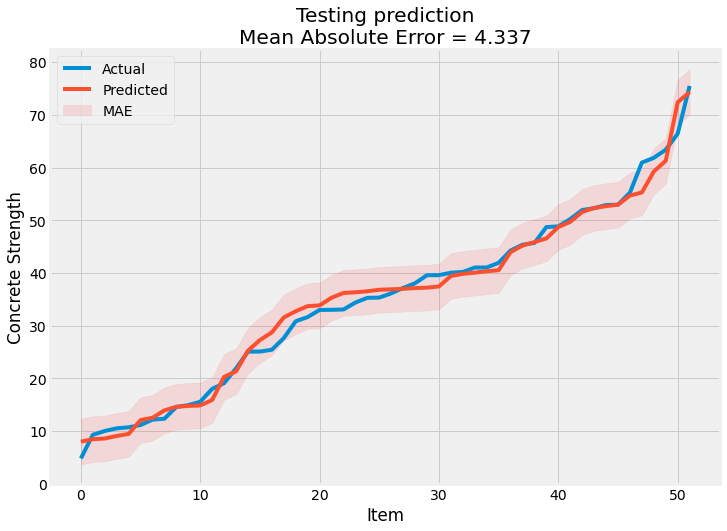

In [ ]:
MAE = mae(Y_ts,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_ts), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')
    plt.fill_between(x=np.arange(0,len(Y_pred)),y1=sorted(Y_pred)+MAE,y2=sorted(Y_pred)-MAE,
                     alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

In [ ]:
rawtest = pd.DataFrame(X_ts.iloc[41]).T
rawtest

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
174,0.684475,0.263495,0.0,0.204473,0.354037,0.423837,0.647516,0.247253


In [ ]:
Y_ts.iloc[41]


75.5

In [ ]:
rawtest = pd.DataFrame(X_ts.iloc[41]).T
prediction = NNR.predict(rawtest)
print(prediction)


[[72.39799]]


In [ ]:
cem_test = {'x1': [252.3],
            'x2': [0],
            'x3': [98.8],
            'x4': [146.3],
            'x5': [14.2],
            'x6': [987.8],
            'x7': [889],
            'x8': [100]
            }
cem_test1 = pd.DataFrame(cem_test)

print(cem_test1)

      x1  x2    x3     x4    x5     x6   x7   x8
0  252.3   0  98.8  146.3  14.2  987.8  889  100


In [ ]:
x_array = np.array([252.3,0,98.8,146.3,14.2,987.8,889,100])
df2 = pd.DataFrame(x_array)
df2

,0
0,252.3
1,0.0
2,98.8
3,146.3
4,14.2
5,987.8
6,889.0
7,100.0


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
pred_norm3 = pd.DataFrame(scaler.fit_transform(df2))
pred_norm3

,0
0,0.255416
1,0.000000
2,0.100020
3,0.148107
4,0.014375
5,1.000000
6,0.899980
7,0.101235


In [ ]:
prediction = NNR.predict(cem_test1)
print(prediction)

[[24313.97]]


In [ ]:
from sklearn import preprocessing
import numpy as np
x_array = np.array([252,0,98.8,146.3,14.2,987.8,889,100])
normalized_arr = preprocessing.normalize([x_array])
# print(normalized_arr)
prediction = NNR.predict(normalized_arr)
print(prediction)

[[19.36795]]


In [ ]:
df1= pd.DataFrame(cem_test)


from sklearn.preprocessing import Normalizer
df1.iloc[:,:] = Normalizer(norm='l2',).fit_transform(df1)

print(df1)


         x1   x2        x3        x4        x5       x6        x7        x8
0  0.184446  0.0  0.072229  0.106954  0.010381  0.72214  0.649911  0.073106


In [ ]:
# example of a normalization
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
arr.reshape(1 , -1 )
from sklearn.preprocessing import MinMaxScaler
# define data

print(arr) , print(arr.shape)
# define min max scaler
scaler = MinMaxScaler()
# transform data
# scaled = scaler.fit_transform(arr)
# print(scaled)

[1 2 3 4 5]
(5,)
